## OUTLIERS


In [91]:
import pandas as pd
import numpy as np

In [92]:
df=pd.read_csv("house_price.csv");
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [93]:
df=df.drop_duplicates()
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


### 1.OUTLIER REMOVAL USING MEAN METHOD


In [94]:
mean = df.	price_per_sqft.mean();
mean

8132.641840177763

In [95]:
median = df.price_per_sqft.median();
median

5500.0

In [96]:
mode = df.price_per_sqft.mode();
mode


0    5000
Name: price_per_sqft, dtype: int64

##### There is a significant difference between the mean value and the median value, which indicates the presence of an outlier

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_16576\3578293563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft ')

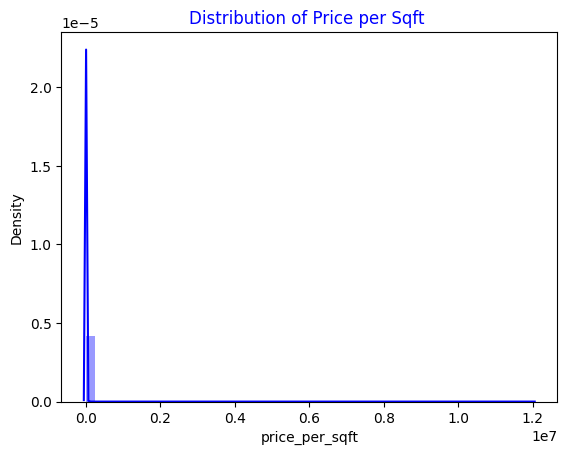

In [98]:
sns.distplot(df['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft ',color='b')

<Axes: ylabel='price_per_sqft'>

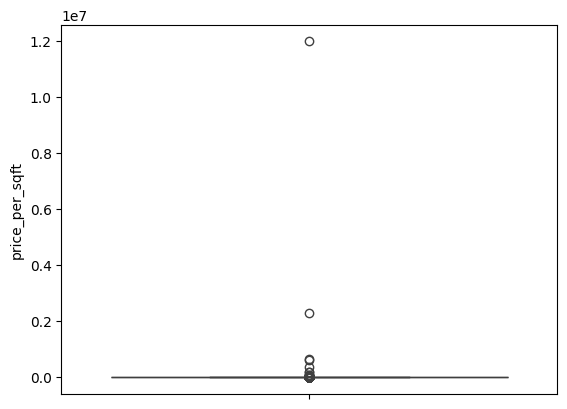

In [99]:
sns.boxplot(df['price_per_sqft'])

In [100]:
qt=df.price_per_sqft.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.93,0.95,0.97,0.99])
qt

0.10     3513.0
0.20     4085.0
0.30     4545.0
0.40     5000.0
0.50     5500.0
0.60     6096.0
0.70     6896.0
0.80     8235.0
0.90    11904.0
0.91    12500.0
0.93    13835.5
0.95    15600.0
0.97    18000.0
0.99    24000.0
Name: price_per_sqft, dtype: float64

In [101]:
outliers=df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13097,other,1 BHK,250.0,2.0,40.0,1,16000
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228


In [102]:
#DATA AFTER REMOVAL OF OUTLIERS
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\User\AppData\Local\Temp\ipykernel_16576\2385713922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

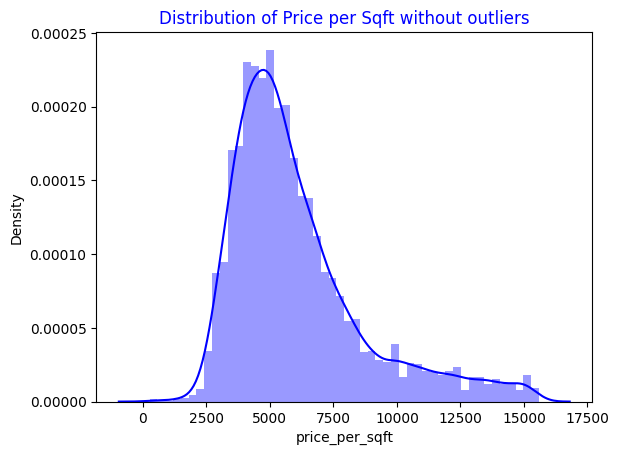

In [103]:
sns.distplot(df1['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers',color='b')

<Axes: ylabel='price_per_sqft'>

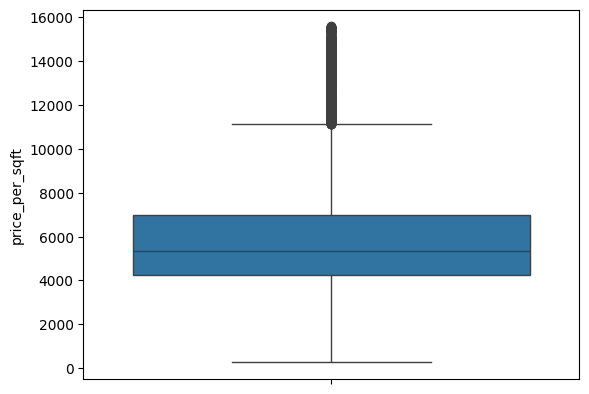

In [104]:
sns.boxplot(df1['price_per_sqft'])

In [105]:
print("Outliers:",len(df)-len(df1))

Outliers: 609


##### Removed 609 outliers using the mean function, resulting in a bell-shaped curve in the distplot.

### 2.OUTLIER REMOVAL USING PERCENTILE METHOD

In [106]:
upper_lt=df.price_per_sqft.quantile(0.95)
print("UPPER LIMIT = ",upper_lt)
lower_lt=df.price_per_sqft.quantile(0.05)
print("LOWER LIMIT = ",lower_lt)

UPPER LIMIT =  15600.0
LOWER LIMIT =  3150.0


In [107]:
df.loc[(df.price_per_sqft>upper_lt) | (df.price_per_sqft<lower_lt)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,3000
13141,other,3 Bedroom,2000.0,2.0,360.00,3,18000
13142,other,2 BHK,1140.0,1.0,185.00,2,16228
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,2812


In [108]:
##DATA AFTER REMOVAL OF OUTLIERS
df2=df.loc[(df.price_per_sqft<=upper_lt) & (df.price_per_sqft>=lower_lt)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\User\AppData\Local\Temp\ipykernel_16576\1414779289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

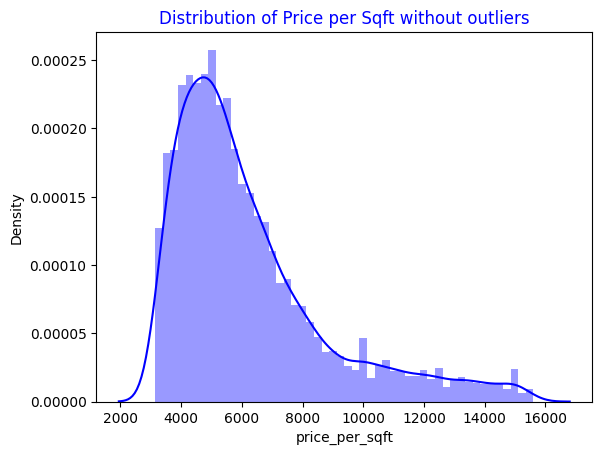

In [109]:
sns.distplot(df2['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers',color='b')

<Axes: ylabel='price_per_sqft'>

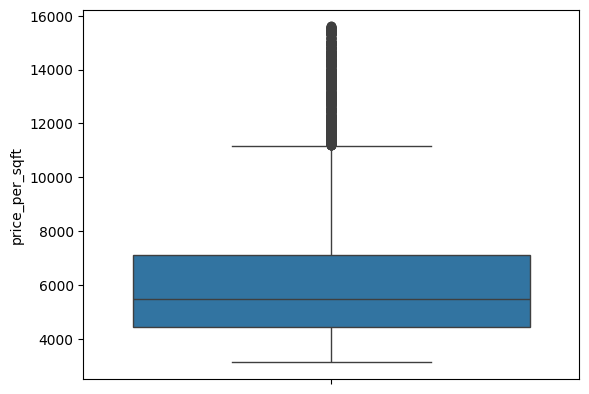

In [110]:
sns.boxplot(df2['price_per_sqft'])

In [111]:
print("Outliers:",len(df)-len(df2))

Outliers: 1211


##### Removed 1211 outliers using the percentile technique, resulting in a  nearly bell-shaped curve in the distplot.

### 3.OUTLIER REMOVAL USING IQR METHOD

C:\Users\User\AppData\Local\Temp\ipykernel_16576\3578293563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft ')

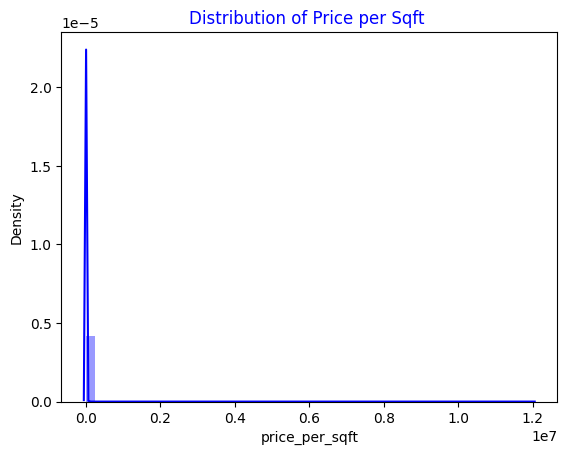

In [112]:
sns.distplot(df['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft ',color='b')

<Axes: ylabel='price_per_sqft'>

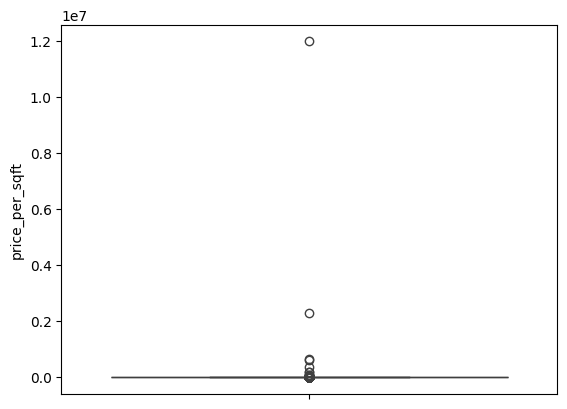

In [113]:
sns.boxplot(df['price_per_sqft'])

In [114]:
Q1=df.price_per_sqft.quantile(0.25)
Q1

12184.5

In [115]:
Q3=df.price_per_sqft.quantile(0.75)
Q3

7461.0

In [122]:
IQR=Q3-Q1
print("IQR=",IQR)

IQR= 3149.0


In [123]:
lower_whisker=Q1-(1.5*IQR)
print("lower_whisker=",lower_whisker)

lower_whisker= -411.5


In [124]:
upper_whisker=Q3+(1.5*IQR)
print("upper_whisker=",upper_whisker)

upper_whisker= 12184.5


In [126]:
df3=df.loc[(df.price_per_sqft<=upper_whisker) & (df.price_per_sqft>=lower_whisker)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [127]:
print('Outliers:',len(df)-len(df3))

Outliers: 1142


C:\Users\User\AppData\Local\Temp\ipykernel_16576\489519387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

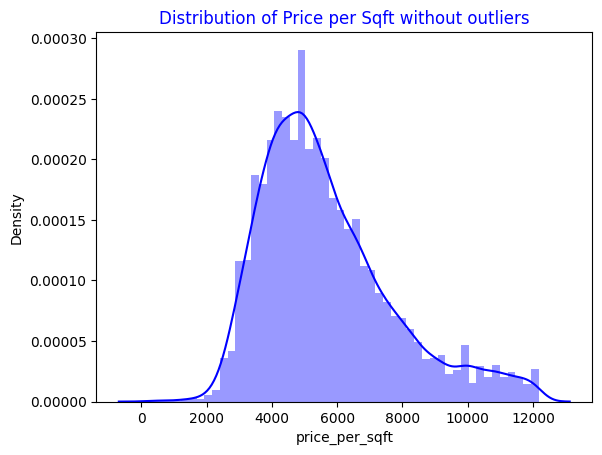

In [129]:
sns.distplot(df3['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers',color='b')

<Axes: ylabel='price_per_sqft'>

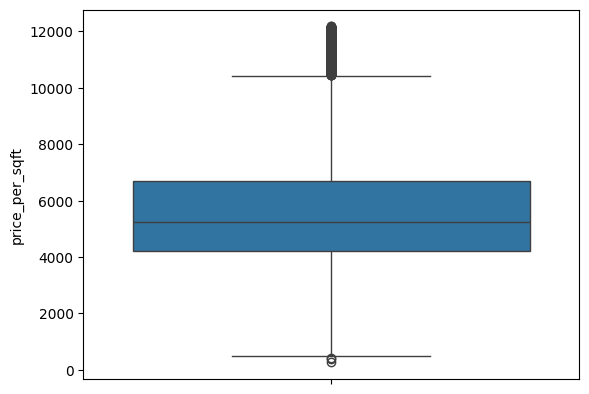

In [130]:
sns.boxplot(df3['price_per_sqft'])

##### Removed 1142 outliers using the IQR technique, resulting in a bell-shaped curve in the distplot.

### 4.OUTLIER REMOVAL USING NORMAL DISTRIBUTION

In [132]:
mean=df.price_per_sqft.mean()
mean

8132.641840177763

In [133]:
std=df.price_per_sqft.std()
std

111232.90089570847

In [137]:
M_3sigma = mean-3*std
M_3sigma

-325566.06084694766

In [139]:
P_3sigma = mean+3*std
P_3sigma

341831.3445273032

In [140]:
df4=df.loc[(df.price_per_sqft<=P_3sigma) & (df.price_per_sqft>=M_3sigma)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\User\AppData\Local\Temp\ipykernel_16576\4199944333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

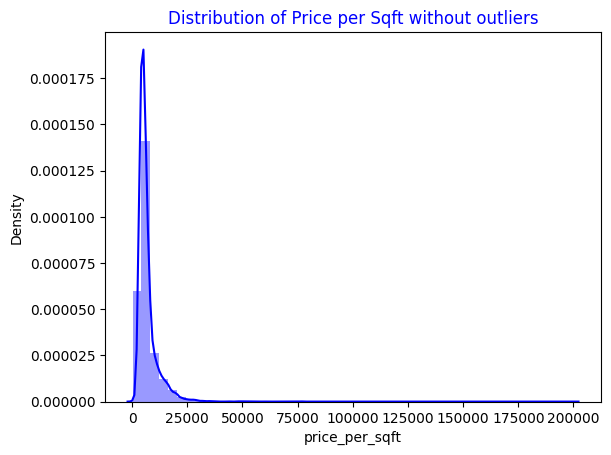

In [141]:
sns.distplot(df4['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers',color='b')

<Axes: ylabel='price_per_sqft'>

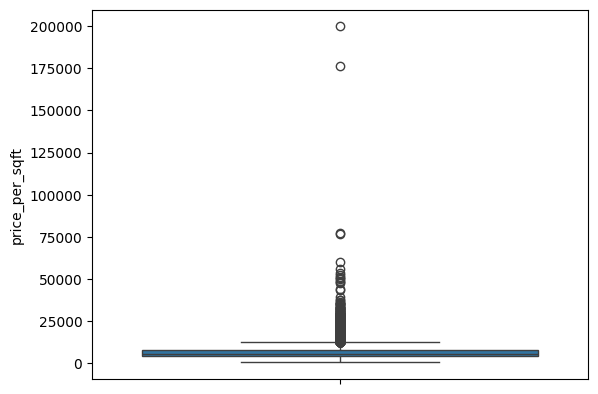

In [144]:
sns.boxplot(df4['price_per_sqft'])

In [143]:
print('Outliers:',len(df)-len(df4))

Outliers: 5


##### Removed 5 outliers from the dataset using normal distribution

### 4.OUTLIER REMOVAL USING Z SCORE

In [145]:
mean=df.price_per_sqft.mean()
mean

8132.641840177763

In [146]:
std=df.price_per_sqft.std()
std

111232.90089570847

In [147]:
lower_limit = mean-3*std
lower_limit

-325566.06084694766

In [148]:
upper_limit = mean+3*std
upper_limit

341831.3445273032

In [149]:
df5=df.loc[(df.price_per_sqft<=upper_limit) & (df.price_per_sqft>=lower_limit)]
df5


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\User\AppData\Local\Temp\ipykernel_16576\3245257496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

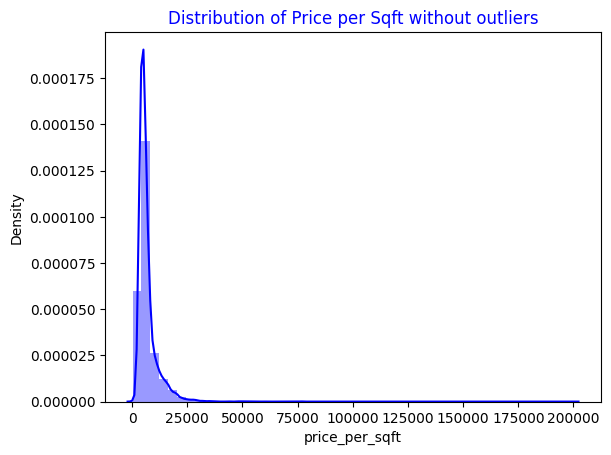

In [150]:
sns.distplot(df5['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers',color='b')

<Axes: ylabel='price_per_sqft'>

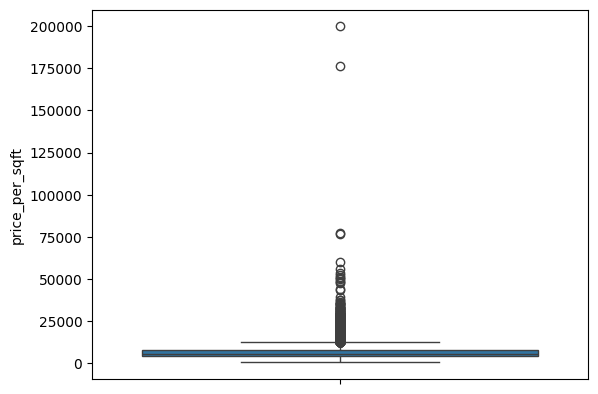

In [151]:
sns.boxplot(df5['price_per_sqft'])

In [152]:
print('Outliers:',len(df)-len(df5))

Outliers: 5


##### Removed 5 outliers from the dataset using the z score technique

## Correlation between all the numerical columns

In [155]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [156]:
#numerical columns
num_col=df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [157]:
corre_matrix=df[num_col].corr()
corre_matrix

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877
bath,0.386694,1.000000,0.448802,0.898875,0.030133
price,0.572516,0.448802,1.000000,0.390008,0.027415
bhk,0.339936,0.898875,0.390008,1.000000,0.030294
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000


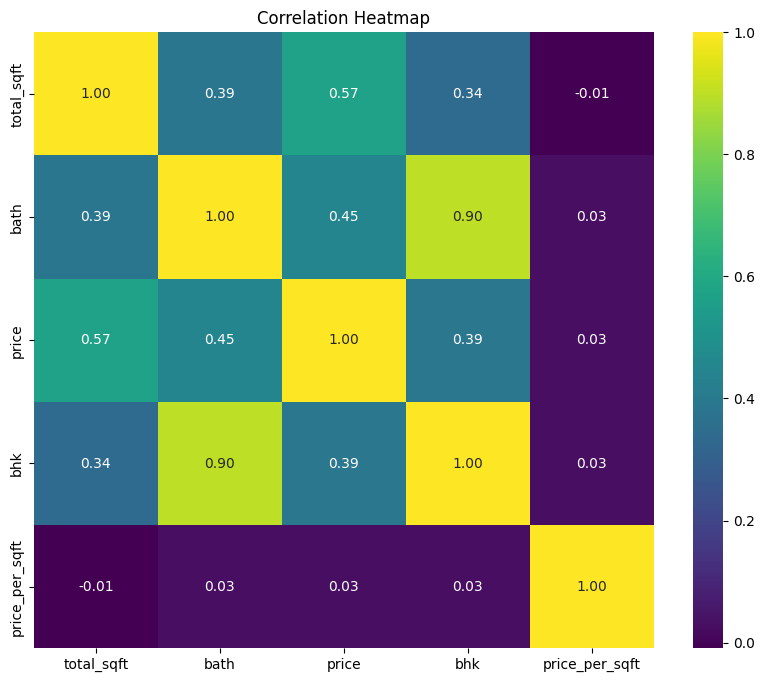

In [162]:
plt.figure(figsize=(10,8))
sns.heatmap(corre_matrix,annot=True,cmap="viridis",fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- *There's a weak negative correlation (-0.01) between Total Sqft and Price Per Sqft, suggesting almost no linear relationship.*
- *Total Sqft shows moderate positive correlations with BHK (0.35), Price (0.57), and Bath (0.39), indicating that larger properties tend to have more bedrooms, higher prices, and more bathrooms.*
- *Bath has a strong positive correlation (0.90) with BHK, indicating a strong linear relationship between the number of bathrooms and bedrooms.*
- *Bath also shows moderate positive correlations with Price (0.46) and Total Sqft (0.39), implying that properties with more bathrooms tend to have higher prices and larger square footage.*
- *Price exhibits moderate positive correlations with BHK (0.40) and Total Sqft (0.57), suggesting that both the number of bedrooms and the total square footage positively impact property prices.*
- *These correlation coefficients provide valuable insights into the interrelation of different factors within the dataset, aiding in understanding and potentially predicting property prices.*ces.*


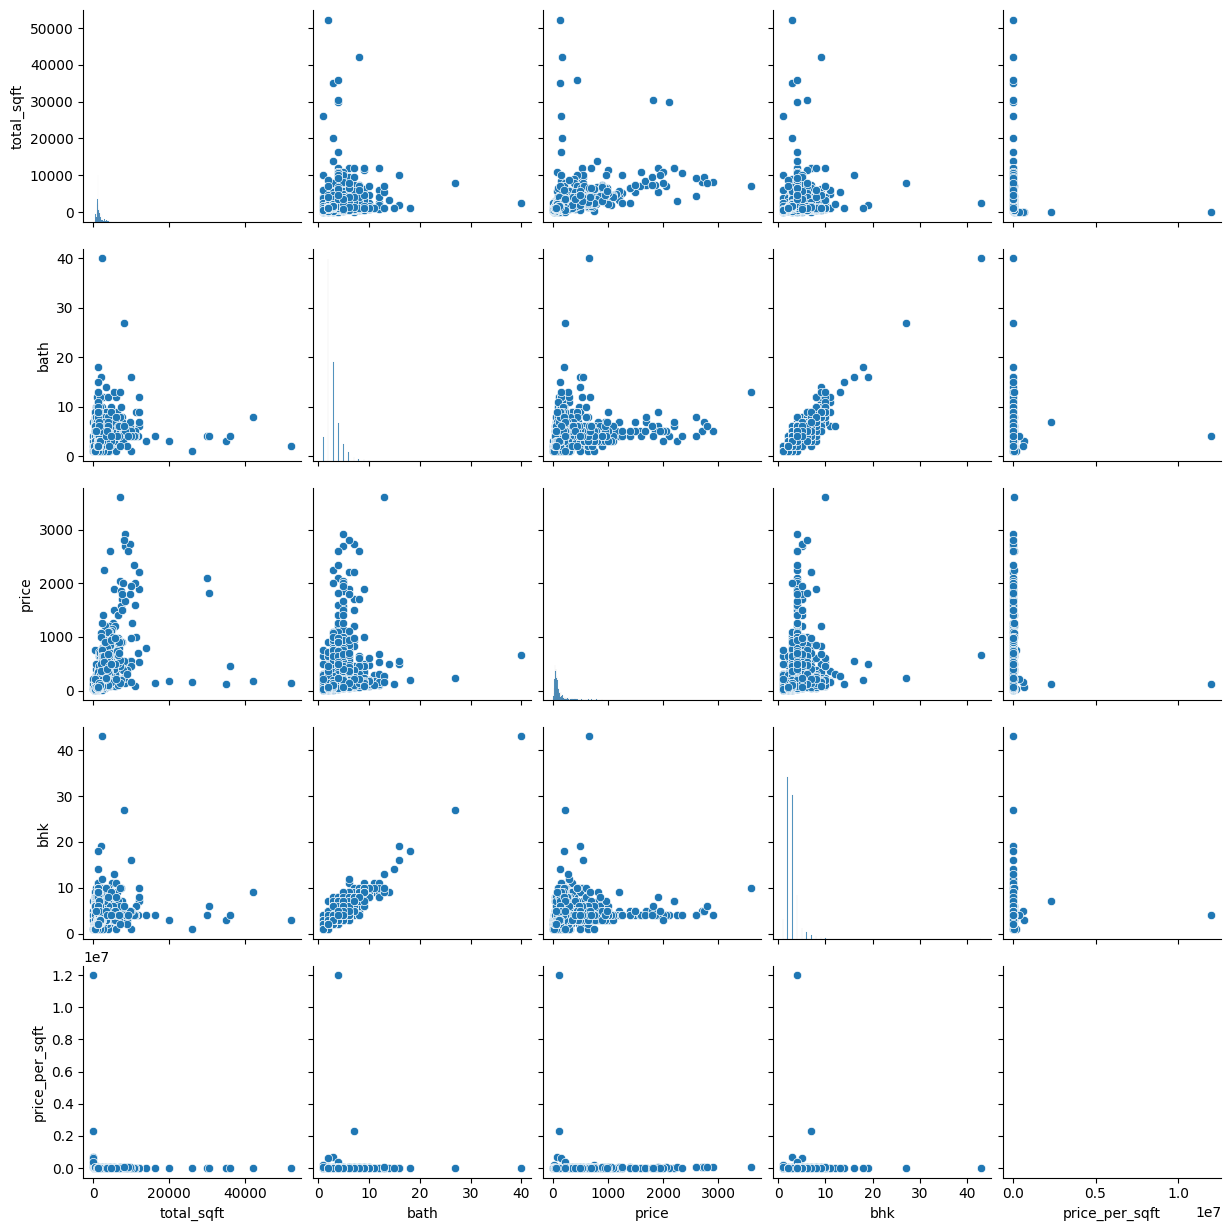

In [163]:
#plot scatterplot
sns.pairplot(df)
plt.show()